## Spectogram generator

Creates jpg files of spectrograms via MEL decomposition fourier transform(stft) on the audio dataset 

In [1]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
from joblib import Parallel, delayed
from tqdm.notebook import tqdm
import glob
import numpy as np
import soundfile as sf

## Create sample spectogram

In [2]:
generate_numpy = False

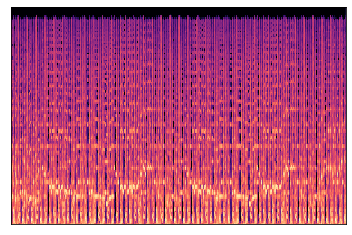

In [3]:
clip, sample_rate = librosa.load('/content/train/000002.ogg', sr=None)
S = librosa.feature.melspectrogram(y=clip, sr=sample_rate)
melspec = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(melspec)

## Generating Spectograms for data (train+test split too)

In [4]:

def create_melspec(filename):  #melspectrogram
    data, sample_rate = librosa.load(filename, sr=None)
    S = librosa.feature.melspectrogram(y=data, sr=sample_rate)
    melspec = librosa.power_to_db(S, ref=np.max)
    return melspec

def create_numpy(filename, dest):
    name = filename.split('/')[-1].split('.')[0]
    melspec = create_melspec(filename)
    np.save(dest  + '/' + name + ".npy", melspec)

def create_spectrogram(filename, dest):  #plot the spectrogram and save as jpg
    name = filename.split('/')[-1].split('.')[0]
    plt.interactive(False)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    melspec = create_melspec(filename)
    librosa.display.specshow(melspec)
    filename  = f"{dest}/{name}.jpg"
    plt.savefig(filename, dpi=400, bbox_inches='tight',pad_inches=0)
    plt.close()    
    fig.clf()
    plt.close(fig)
    plt.close('all')
    del fig,ax

In [7]:
!mkdir -p /content/train
!mkdir -p /content/spectograms/test
train_files = glob.glob('/content/train/*.ogg')
test_files = glob.glob('/content/test/*.ogg')

In [8]:
_ = Parallel(n_jobs=-1)(delayed(create_spectrogram)(file, '/content/spectograms/train') for file in tqdm(train_files))

  0%|          | 0/19909 [00:00<?, ?it/s]

In [9]:
_ = Parallel(n_jobs=-1)(delayed(create_spectrogram)(file, '/content/spectograms/test') for file in tqdm(test_files))

  0%|          | 0/5076 [00:00<?, ?it/s]

## Creating Numpy

In [11]:

!mkdir -p /kaggle/npy/train
!mkdir -p /kaggle/npy/test
_ = Parallel(n_jobs=-1)(delayed(create_numpy)(file, '/content/npy/train') for file in tqdm(train_files))
_ = Parallel(n_jobs=-1)(delayed(create_numpy)(file, '/content/npy/test') for file in tqdm(test_files))